# Ensemble Learning

集成学习的思想很简单，就是构建多个学习器一起结合来完成具体的学习任务。通过将多个学习器进行结合，常可获得比单一学习器显著优越的泛华性能，对弱学习器尤为明显。（三个臭皮匠，顶个诸葛亮）

弱学习器是指学习器的学习正确率仅比随机猜测略好，强学习器是指学习器的学习正确率很高。集成学习就是结合多个弱分类器组成一个强分类器。

集成学习可以分成两类：

- 个体学习器间存在强依赖关系，必须串行生成学习模型。代表：Boosting（AdaBoost, Gradient Boosting Machine）。
- 个体学习器间不存在强依赖关系，可同时生成学习模型。代表：Bagging和随机森林（Random Forest）。

## AdaBoost

提升方法是从弱学习算法出发，反复学习，得到一系列弱分类器，然后组合这些弱分类器，构成一个强分类器。对于提升方法来说，有两个问题需要回答：一是在每一轮如何改变训练数据的权值或概率分布；二是如何将弱分类器组合成一个强分类器。关于第1个问题，AdaBoost的做法是，提高那些被前一轮弱分类器错误分类样本的权值，而降低那些被正确分类样本的权值。这样一来，那些没有得到正确分类的数据，由于其权值的加大而受到后一轮的弱分类器的更大关注。于是，分类问题被一系列的弱分类器“分而治之”。至于第2个问题，即弱分类器的组合，AdaBoost采取加权多数表决的方法。具体地，加大分类误差率小的弱分类器的权值，使其在表决中起较大的作用，减少分类误差率大的弱分类器的权值，使其在表决中起较少的作用。

假设给定一个二分类的训练数据集
$$
T = \{(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N)\}
$$
其中，每个样本点由实例与标记组成。实例$x_i \in \mathcal{X} \subseteq R^n$，$y_i \in \mathcal{Y} = \{-1, +1\}$，$\mathcal{X}$是实例空间，$\mathcal{Y}$是标记集合。AdaBoost利用以下算法，从训练数据中学习一系列弱分类器或基本分类器，并将这些弱分类器线性组合成为一个强分类器。

输入：训练数据集$T=\{(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N)\}$，其中$x_i \in \mathcal{X} \subseteq R^n$，$y_i \in \mathcal{Y} = \{-1, +1\}$；  
输出：最终分类器$G(x)$。  
(1)初始化训练数据的权值分布
$$
D_1 = (w_{11}, \cdots, W_{1i}, \cdots, W_{1N}), w_{1i} = \frac{1}{N}, i = 1, 2, \cdots, N
$$
(2)对$m=1,2,\cdots,M$  
(a)使用具有权值分布$D_m$的训练数据集学习，得到基本分类器
$$
G_m(x):\mathcal{X}\to \{-1, +1\}
$$
(b)计算$G_m(x)$在训练数据集上的分类误差率
$$
e_m = \sum_{i=1}^{N} P(G_m(x_i) \not = y_i) = \sum_{i=1}^{N} w_{mi} I(G_m(x) \not = y_i)
$$
(c)计算$G_m(x)$的系数
$$
\alpha_m = \frac{1}{2} \log \frac{1-e_m}{e_m} \tag{1}
$$
(d)更新训练数据集的权值分布
$$
D_{m+1} = (w_{m+1,1}, \cdots, w_{m+1,i}, \cdots, w_{m+1,N})
$$
$$
w_{m+1, i} = \frac{w_{mi}}{Z_m} \exp (-\alpha_m y_i G_m(x_i))), i = 1, 2, \cdots, N \tag{2}
$$
这里，$Z_m$是规范化因子
$$
Z_m = \sum_{i=1}^{N} w_{mi} \exp(-\alpha_m y_i G_m(x_i))
$$
它使$D_{m+1}$成为一个概率分布。  
(3)构建基本分类器的线性组合
$$
f(x) = \sum_{m=1}^{M} \alpha_m G_m(x)
$$
得到最终分类器
$$
G(x) = sign(f(x)) = sign \left( \sum_{m=1}^{M} \alpha_m G_m(x) \right)
$$
到此，算法结束。

观察公式（1）$e_m$-$\alpha_m$的曲线图
![e_m-alpha_m](images/image1.png)
可以看到，当分类误差率低时，$\alpha_m$的值较高，当分类误差率高时，$\alpha_m$的值较低。

来考虑一下，$e_m$是否会取0或1。如果$e_m = 0$，说明弱分类器的效果非常好，正确率100%，可以停止迭代了！如果$e_m = 1$，说明弱分类器的对所有样本都分类错误，学习出一个效果最差的分类器， 这种情况出现的概率有多低！

训练数据的权值分布的更新公式（2）可以写成：
$$
w_{m+1,i} = \begin{cases} \frac{w_{mi}}{Z_m}e^{-\alpha_m}, & G_m(x_i) = y_i \\ \frac{w_{mi}}{Z_m}e^{\alpha_m}, & G_m(x_i) \not = y_i \end{cases}
$$
由此可知，被基本分类器$G_m(x)$误分类样本的权值得以扩大，而被正确分类样本的权值得以缩小。因此，误分类样本在下一轮学习中起更大的作用。不改变所给的训练数据，而不断改变训练数据权值的分布，使得训练数据在基本分类器的学习中起不同的作用，这是AdaBoost的一个特点。

**任务1：**根据上述的AdaBoost算法，实现AdaBoost函数。弱分类器使用CART算法。

提示：scikit-learn是一个简单而有效的python机器学习算法库，里面包含了许多常见的机器学习算法（包括本课程讲的算法）。这里直接使用scikit-learn实现的CART算法，方便我们完成实验。点击[这里](http://scikit-learn.org/stable/)查看scikit-learn的官方文档，点击[这里](http://scikit-learn.org/stable/modules/tree.html#classification)查看scikit-learn实现的CART算法的API接口。

In [1]:
import numpy as np
from sklearn import tree

def adaboost(X, y, M):
    """
    adaboost函数，使用CART作为弱分类器
    参数:
        X: 训练样本
        y: 样本标签, y = {-1, +1}
        M: 使用M个弱分类器
    返回:
        f: 生成的模型
    """
    num_X, num_feature = X.shape
    
    ### START CODE HERE ###
    # 初始化训练数据的权值分布
    D = np.ones((num_X))/num_X
    
    G = []
    alpha = []
    
    for m in range(M):
        # 使用具有权值分布D_m的训练数据集学习，得到基本分类器
        # 使用tree.DecisionTreeClassifier，设置树深度为5，random_state=0
        G_m = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
        # 开始训练
        G_m.fit(X, y, D)
        # 计算G_m在训练数据集上的分类误差率
        y_pred = G_m.predict(X)
        e_m = D[y != y_pred].sum()
        
        if e_m == 0:
            break
        
        if e_m == 1:
            raise ValueError("e_m = {}".format(e_m))
            
        # 计算G_m的系数
        alpha_m = 0.5 * np.log( (1 - e_m) / e_m )
        # 更新训练数据集的权值分布
        D = D * np.exp(-alpha_m * y * y_pred)
        D = D / D.sum()
        # 保存G_m和其系数
        G.append(G_m)
        alpha.append(alpha_m)
    
    # 构建基本分类器的线性组合
    def f(X):
        num_G = len(G)
        score = 0
        for i in range(num_G):
            score += alpha[i] * G[i].predict(X)
        return np.sign(score)
        
    ### END CODE HERE ###
    return f

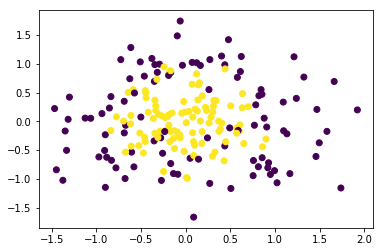

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

# 使用scikit-learn生成数据集
X, y = make_circles(n_samples=200,noise=0.4,factor=0.2,random_state=1)
# 把标签“0”变为“-1”
y[y == 0] = -1

# 可视化生成的数据集
plt.scatter(X[:, 0], X[:, 1], c=y)

Accuracy of CART model is 0.9


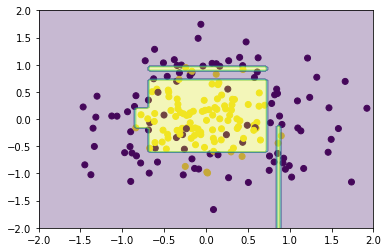

In [3]:
# 首先使用CART对数据进行训练
cart_model = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
cart_model.fit(X, y)
accuracy_cart = cart_model.score(X, y)
print("Accuracy of CART model is {}".format(accuracy_cart))

# 可视化CART的分类效果
x1_grid = np.linspace(-2, 2, 100)
x2_grid = np.linspace(-2, 2, 100)

x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
y_grid_simple = np.zeros_like(x1_grid)

X_grid = np.hstack([x1_grid.reshape(-1, 1), x2_grid.reshape(-1, 1)])
y_grid = cart_model.predict(X_grid)
y_grid_simple = y_grid.reshape(100, 100)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(x1_grid, x2_grid, y_grid_simple, alpha=0.3)

Accuracy of AdaBoost model is 1.0


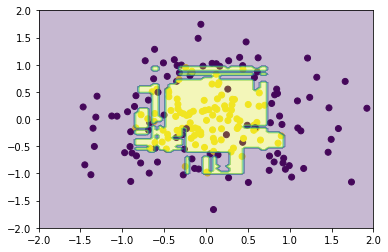

In [4]:
# 接着使用AdaBoost对数据进行训练
adaboost_model = adaboost(X, y, 40)
y_pred_adaboost = adaboost_model(X)
accuracy_adaboost = np.mean(y_pred_adaboost == y)
print("Accuracy of AdaBoost model is {}".format(accuracy_adaboost))

y_grid = adaboost_model(X_grid)
y_grid_adaboost = y_grid.reshape(100, 100)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(x1_grid, x2_grid, y_grid_adaboost, alpha=0.3)

比较树深度为5的CART和使用树深度为5的CART作为弱分类器的AdaBoost算法的分类结果，可以看到，AdaBoost算法提高了分类精度。AdaBoost算法的主要贡献是减低了模型的偏差。

## Gradient Boosting Machine (GBM)

GBM和AdaBoost一样采用加法模型：$H(x) = \sum_{t=1}^{T} \alpha_t h_t(x)$，但GBM拓展为可以采用其他任意损失$l$（如前面介绍过的平方损失、交叉熵损失等）。

GBM一般采用决策树（或回归树）作为基学习器，称为Gradient Boosting Decision Tree (GBDT)，针对不同问题使用不同的损失函数，分类问题使用指数损失函数，回归问题使用平方误差损失函数。

GBDT的加法模型为:
$$
f_m(x) = \sum_{m=1}^{M} T(x;\Theta_m)
$$
其中$T(x;\Theta_m)$表示决策树；$\Theta_m$为决策树参数；M为树的个数。

GBDT采用前向分步算法。首先确定初始提升树$f_0(x) = 0$，第m步的模型是
$$
f_m(x) = f_{m-1}(x) + T(x; \Theta_m)
$$
其中，$f_{m-1}$为当前模型，通过经验风险极小化确定下一棵决策树的参数$\Theta_m$，
$$
\hat{\Theta}_m = \arg \underset{\Theta_m}{\min} \sum_{i=1}^{N} L(y_i, f_{m-1}(x_i) + T(x_i; \Theta_m))
$$
为了能够得到最优的下一棵决策树，Freidman提出了梯度提升（gradient boosting）算法。这是利用最速下降法的近似方法，其关键是利用损失函数的负梯度在当前模型的值
$$
-\left[ \frac{\partial L(y, f(x_i))}{\partial f(x_i)} \right]_{f(x) = f_{m-1}(x)}
$$
作为回归问题提升树算法中的残差的近似值，拟合一个回归树。

GBDT算法  
输入：训练数据集$T=\{(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N)\}$，$x_i \in \mathcal{X} \subseteq R^n$，$y_i \in \mathcal{Y} \subseteq R$;  
输出： 回归树$\hat{y}(x)$。  
（1）初始化
$$
f_0(x) = \arg \underset{c}{\min}\sum_{i=1}^{N}L(y_i, c)
$$
（2）对$m=1,2,\cdots,M$  
(a)对$i=1,2,\cdots,N$，计算
$$
r_{mi} = -\left[ \frac{\partial L(y, f(x_i))}{\partial f(x_i)} \right]_{f(x) = f_{m-1}(x)}
$$
(b)对$r_{mi}$拟合一个回归树，得到第m棵树的叶结点区域$R_{mj}$，$j=1,2,\cdots,J$  
(c)对$j=1,2,\cdots,J$，计算
$$
c_{mj} = \arg \underset{c}{\min} \sum_{x_i \in R_{mj}} L(y_i, f_{m-1}(x_i) + c)
$$
(d)更新$f_m(x) = f_{m-1}(x) + \sum_{j=1}^{J} c_{mj}I(x \in R_{mj})$  
（3）得到回归树
$$
\hat{f}(x) = f_M(x) = \sum_{m=1}^{M} \sum_{j=1}^{J}c_{mj}I(x \in R_{mj})
$$

虽然说GBDT使用的是回归树，当是也可以用于分类问题，还记得Logistic Regression吗？逻辑回归解决的是二元分类问题，softmax可以解决多分类问题。如果损失函数$L(y, f(x_i))$为交叉熵损失，GBDT就可以解决分类问题，如果损失函数$L(y, f(x_i))$为平方差损失，GBDT就可以解决回归问题。

$x_i$的平方差损失为
$$
L(y, f(x_i)) = \frac{1}{2} (y_i - f(x_i))^2
$$
对应的$r_{mi}$为
$$
r_{mi} = -\left[ \frac{\partial L(y, f(x_i))}{\partial f(x_i)} \right]_{f(x) = f_{m-1}(x)} = y - f_{m-1}(x)
$$

$x_i$的交叉熵损失为
$$
L(y, g(x_i)) = - y_i \log (g(x_i)) - (1 - y_i) \log (1 - g(x_i)) 
$$
其中$g(x_i) = sigmoid(f(x_i))$，
对应的$r_{mi}$为
$$
r_{mi} = -\left[ \frac{\partial L(y, f(x_i))}{\partial f(x_i)} \right]_{f(x) = f_{m-1}(x)} = y - g(f_{m-1}(x))
$$

**任务2：**根据上述的GBDT算法，实现用于二分类的gbdt函数。

In [5]:
def sigmoid(x):
    """
    计算sigmoid函数值
    """
    return 1 / (1 + np.exp(-x))


def gbdt_classifier(X, y, M):
    """
    用于分类的GBDT函数
    参数:
        X: 训练样本
        y: 样本标签，y = {0, +1}
        M: 使用M个回归树
    返回:
        f: 生成的模型
    """
    m,n = X.shape
    f = []
    # 初始化
    ### START CODE HERE ###
    # 用0初始化线性相乘的结果y_reg
    y_reg = np.zeros(y.shape)
    # 根据y_reg计算预测的结果y_pred
    y_pred = sigmoid(y_reg)
    
    for m in range(M):
        # 计算r
        r = y - y_pred
        
        # 拟合r
        # 使用tree.DecisionTreeRegressor，设置树深度为5，random_state=0
        f_m = tree.DecisionTreeRegressor(max_depth=5, random_state=0)
        # 开始训练
        f_m.fit(X,r)
        # 更新f
        f.append(f_m)
        
        y_reg += f_m.predict(X)
        y_pred = sigmoid(y_reg)
    
    ### END CODE HERE ###
    def model(X):
        num_X, _ = X.shape
        reg = np.zeros((num_X))
        for t in f:
            reg += t.predict(X)
        return np.sign(reg)
    
    ### END CODE HERE ###
    return model

Accuracy of GBDT model is 0.955


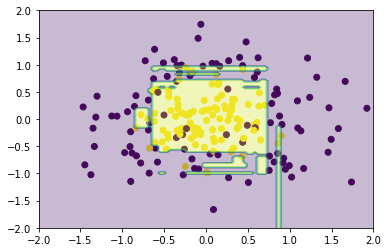

In [6]:
# 把标签“0”变为“-1”
y[y == -1] = 0

gbdt_cls = gbdt_classifier(X, y, 10)
y_pred_gbdt = gbdt_cls(X)

one_position = y_pred_gbdt >= 0.5
y_pred_gbdt[one_position] = 1
y_pred_gbdt[~one_position] = 0

accuracy_gbdt = np.mean(y_pred_gbdt == y)
print("Accuracy of GBDT model is {}".format(accuracy_gbdt))

y_grid = gbdt_cls(X_grid)
y_grid_gbdt = y_grid.reshape(100, 100)
one_position = y_grid_gbdt >= 0.5
y_grid_gbdt[one_position] = 1
y_grid_gbdt[~one_position] = 0

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(x1_grid, x2_grid, y_grid_gbdt, alpha=0.3)

可以看到，GBDT确实提高了分类精度。

**任务3：**实现用于回归的gbdt函数。

In [7]:
def gbdt_regressor(X, y, M):
    """
    用于回归的GBDT函数
    参数:
        X: 训练样本
        y: 样本标签
        M: 使用M个回归树
    返回:
        f: 生成的模型
    """
    m,n = X.shape
    f = []
    # 初始化
    ### START CODE HERE ###
    # 根据步骤1，最优的预测标签f_0是y的平均值
    f_0 = np.mean(y)
    y_pred = f_0
    
    for m in range(M):
        # 计算r
        r = y - y_pred
        
        if np.sum(r) == 0:
            # 已经完全拟合训练数据
            break
        
        # 拟合r
        # 使用tree.DecisionTreeRegressor，设置树深度为5，random_state=0
        f_m = tree.DecisionTreeRegressor(max_depth=5, random_state=0)
        # 开始训练
        f_m.fit(X,r)
        # 更新f
        f.append(f_m)
        
        y_pred += f_m.predict(X)
    
    ### END CODE HERE ###
    def model(X):
        num_X, _ = X.shape
        pred = np.ones((num_X)) * f_0
        for t in f:
            pred += t.predict(X)
        return pred

    ### END CODE HERE ###
    return model

loss of CART model is 0.008974256548067702
loss of GBDT model is 0.0022895551966146386


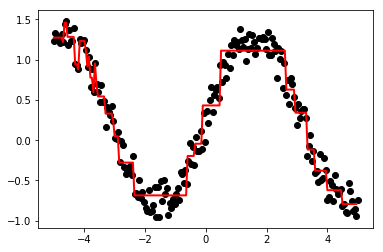

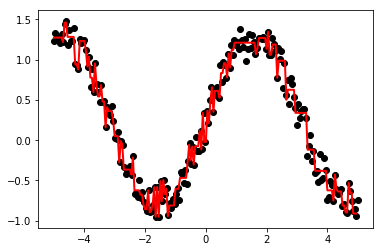

In [8]:
np.random.seed(0)

X = np.linspace(-5, 5, 200)
y = np.sin(X)
y = y + np.random.rand(1, len(y)) * 0.5 # 加入噪声

X = X.reshape(-1, 1)
y = y.reshape(-1)

# 使用CART回归树模拟sin函数
cart_regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=0)
cart_regressor.fit(X, y)

loss_cart = cart_regressor.score(X, y)
y_pred = cart_regressor.predict(X)
loss_cart = np.mean(np.power(y - y_pred, 2)) / 2
print("loss of CART model is {}".format(loss_cart))

X_show = np.arange(-5, 5, 0.05).reshape(-1, 1)
y_show_cart = cart_regressor.predict(X_show)

plt.figure()
plt.scatter(X, y, c="k")
plt.plot(X_show, y_show_cart, c="r", label="CART", linewidth=2)

# 使用GBDT模拟sin函数
gbdt_reg = gbdt_regressor(X, y, 5)
y_pred = gbdt_reg(X)
loss_gbdt = np.mean(np.power(y - y_pred, 2)) / 2
print("loss of GBDT model is {}".format(loss_gbdt))

y_show_gbdt = gbdt_reg(X_show)
plt.figure()
plt.scatter(X, y, c="k")
plt.plot(X_show, y_show_gbdt, c="r", label="GBDT", linewidth=2)

可以看到，GBDT的回归效果比CART要好。

## Bagging

Bagging算法很简单，利用自助采样（有放回的均匀抽样）得到T组训练样本集，分别利用这些训练样本集训练T个分类器（CART or SVM or others），最后进行投票集成。

从偏差-方差分解的角度看，Bagging主要关注降低方差，因此它在不剪枝决策树、神经网络等易受样本扰动的学习器上效果更为明显。

**任务4：**实现Bagging函数。

In [9]:
def bagging(X, y, T, size, seed=0):
    """
    Bagging算法，分类器为CART，用于二分类
    参数：
        X: 训练集
        y: 样本标签, y={-1, +1}
        T: T组
        size: 每组训练集的大小
        seed: 随机种子
    返回：
        f: 生成的模型
    """
    classifiers = []
    m, n = X.shape
    
    ### START CODE HERE ###
    np.random.seed(seed)
    for i in range(T):
        # 使用np.random.choice选择size个序号，注意replace参数的设置，以满足有放回的均匀抽样。
        index = np.random.choice(a=m, size=size, replace=True)
        X_group = X[index]
        y_group = y[index]
        # 使用tree.DecisionTreeClassifier，设置max_depth=None, min_samples_split=2(生成完全树),random_state=0
        t = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
        # 开始训练
        t.fit(X_group, y_group)
        classifiers.append(t)
    
    def model(X):
        pred = []
        # 计算所有分类器的预测结果
        for t in classifiers:
            pred.append(t.predict(X))
        # 把预测结果组成 num_X * T 的矩阵
        pred = np.transpose(np.array(pred))
        # 计算"1"有多少投票
        vote_1 = np.sum(pred, axis=1)
        # 计算"0"有多少投票
        vote_0 = T - vote_1
        # 选择投票数最多的一个标签
        pred = vote_1 > vote_0
        
        return pred
    
    ### END CODE HERE ###
    return model

生成数据集，并划分数据集为训练集和验证集

In [10]:
# 生成数据
m_data = 2000
X, y = make_circles(n_samples=m_data,noise=0.5,factor=0.2,random_state=1)
# 划分数据集
np.random.seed(0)
index = np.random.rand(m_data)
index_train = index <= 0.7
index_val = ~index_train

X_train = X[index_train]
y_train = y[index_train]
m_train, _ = X_train.shape

X_val = X[index_val]
y_val = y[index_val]
m_val, _ = X_val.shape

print(X_train.shape)
print(X_val.shape)

(1373, 2)
(627, 2)


用训练集训练一个CART模型，并用验证集验证。

In [11]:
cart = tree.DecisionTreeClassifier(max_depth=10)
cart.fit(X_train, y_train)
accuracy_cart_train = cart.score(X_train, y_train)
accuracy_cart_val = cart.score(X_val, y_val)
print("Accuracy of CART model in trainset is {}".format(accuracy_cart_train))
print("Accuracy of CART model in validation set is {}".format(accuracy_cart_val))

Accuracy of CART model in trainset is 0.8215586307356154
Accuracy of CART model in validation set is 0.671451355661882


In [12]:
bagging_model = bagging(X_train, y_train, 3, m_train//3)

y_pred = bagging_model(X_train)
accuracy_bagging_train = np.mean(y_pred == y_train)

y_pred = bagging_model(X_val)
accuracy_bagging_val = np.mean(y_pred == y_val)
print("Accuracy of bagging model in trainset is {}".format(accuracy_bagging_train))
print("Accuracy of bagging model in validation set is {}".format(accuracy_bagging_val))

Accuracy of bagging model in trainset is 0.7589220684632192
Accuracy of bagging model in validation set is 0.6650717703349283


从CART和Bagging的比较结果来看，Bagging降低了模型的方差。

## Random Forest

随机森林是Bagging的一个扩展变体，它充分利用“随机”的思想来增加各分类器的多样性。“随机”体现在两个方面：基于自助采样法来选择训练样本和随机选择特征（或属性）。随机选择特征是指，对基决策树的每个节点，先从该节点的属性集合中随机选择一个包含k个属性的子集，然后再从这个子集中选择一个最优属性用于划分。这里的参数k控制了随机性和引入程度，一般情况下，推荐值$k=\log_2d$(假设有d个属性)。随机森林的弱分类器一般是CART。随机森林的特点是可高度并行化、继承了CART的优点和克服了完全生长树的缺点。

Scikit-learn实现的CART算法默认随机选择特征，因此，已经实现的bagging函数就是Random Forest的实现函数。Scikit-learn实现的Random Forest算法最后的集成方法不是投票法，而是平均法，平均每个弱分类器的预测结果作为随机森林的输出结果。

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(X_train, y_train)
accuracy_rf_train = rfc.score(X_train, y_train)
accuracy_rf_val = rfc.score(X_val, y_val)
print("Accuracy of random forest model in trainset is {}".format(accuracy_rf_train))
print("Accuracy of random forest in validation set is {}".format(accuracy_rf_val))

Accuracy of random forest model in trainset is 0.9227967953386744
Accuracy of random forest in validation set is 0.6443381180223285


D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


比较Random Forest算法和Bagging算法的结果，Bagging的在训练集的精度比较低，原因是Bagging中每个弱分类器使用的训练集是总训练集的1/3，但是这样做的好处是Bagging在验证集的精度比较高，得到的模型的泛化性能比较好。